In [4]:
! pip install ultralytics


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO('/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/best.pt')

In [8]:
! pip install natsort


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [125]:
import natsort
import os

# path = '/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/car_video_gunja_snap'
path = '/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/집앞1_snap'
filelist = natsort.natsorted(os.listdir(path))


save_path = path + "_yolo_predict"
try:
    if not os.path.exists(save_path):
        os.makedirs(save_path)
except OSError:
    print ('Error: Creating directory. ' +  save_path)



In [126]:
import cv2
from matplotlib import pyplot as plt
import easyocr

def ocr(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bilateral_filtered_image = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bilateral_filtered_image, 30, 200)

	# 번호판 영역 검출
    contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.018 * perimeter, True)
        if len(approx) == 4:  # 번호판은 주로 4개의 꼭짓점을 가짐
            x, y, w, h = cv2.boundingRect(contour)
            plate_image = image[y:y + h, x:x + w]

			# 번호판 부분에 bounding box 그리기
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            break
    print(approx)
    reader = easyocr.Reader(['ko'])
    result = reader.readtext(plate_image)
    for detection in result:
        text = detection[1]
        print("인식된 번호판:", text)
    # 결과 이미지 보여주기
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 축 숨기기
    plt.show()

In [127]:

# for file in filelist:
# 	img = path +"/"+ file
# 	ocr(img)

In [128]:
i=0
for file in filelist:
	if file == ".DS_Store":
		continue
	# if i<950:
	# 	i+=1
	# 	continue
	result = model.predict(source = path +"/"+ file)
	# if i==950:
	# 	break
	break


image 1/1 /Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/집앞1_snap/frame0.jpg: 640x384 1 front bumper, 1 radiator grille, 1 head ramp, 163.1ms
Speed: 2.2ms preprocess, 163.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


In [129]:
# conflist = result[0].boxes.cls
# len(conflist)

class_dict = {0.0 : "차량전체", 1.0 : "프론트범퍼", 2.0 : "리어범퍼", 3.0 : "타이어(휠)",
			  4.0 : "A필러", 5.0 : "C필러", 6.0 : "사이드미러", 7.0 : "앞도어",
			  8.0 : "뒷도어", 9.0 : "라디에이터그릴", 10.0 : "헤드램프", 11.0 : "리어램프",
			  12.0 : "보닛", 13.0 : "트렁크", 14.0 : "루프"}

box = result[0].boxes
print(box)
center_list = []
for i in range(len(box.xyxyn)):
	box_center_n = [(box.xyxyn[i][0]+box.xyxyn[0][2])/2 ,(box.xyxyn[i][1]+box.xyxyn[0][3])/2]
	center_list.append(box_center_n)
for i in range(len(box.xyxyn)):
	print(f"{class_dict[int(box.cls[i])]} ({int(box.cls[i])}) 클래스의 bbox 중심좌표 :",center_list[i])

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 1.,  9., 10.])
conf: tensor([0.9046, 0.6697, 0.5421])
data: tensor([[0.0000e+00, 9.8708e+02, 1.0800e+03, 1.3861e+03, 9.0463e-01, 1.0000e+00],
        [3.8583e+02, 8.4363e+02, 1.0774e+03, 1.3250e+03, 6.6973e-01, 9.0000e+00],
        [3.1895e+00, 6.5458e+02, 3.1976e+02, 9.8920e+02, 5.4207e-01, 1.0000e+01]])
id: None
is_track: False
orig_shape: (1920, 1080)
shape: torch.Size([3, 6])
xywh: tensor([[ 540.0000, 1186.6123, 1080.0000,  399.0619],
        [ 731.6100, 1084.3186,  691.5509,  481.3810],
        [ 161.4764,  821.8868,  316.5738,  334.6187]])
xywhn: tensor([[0.5000, 0.6180, 1.0000, 0.2078],
        [0.6774, 0.5647, 0.6403, 0.2507],
        [0.1495, 0.4281, 0.2931, 0.1743]])
xyxy: tensor([[   0.0000,  987.0813, 1080.0000, 1386.1432],
        [ 385.8346,  843.6281, 1077.3855, 1325.0090],
        [   3.1895,  654.5775,  319.7633,  989.1962]])
xyxyn: tensor([[0.0000, 0.5141, 1.0000, 0.7219],
        [0.3573, 0.4394,

In [130]:
# conflist = result[0].boxes.conf
# tf_list = conflist>0.75
# for tf in tf_list:
# 	if tf==0:
# 		break

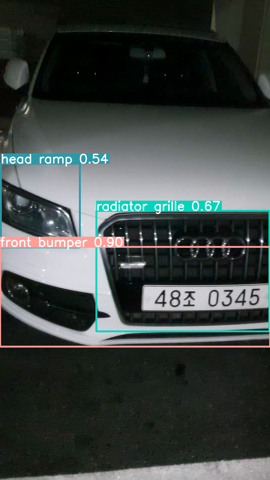

In [131]:
from PIL import Image
for r in result:
	im_ = r.plot()
	IM = Image.fromarray(im_[..., ::-1])
	IM = IM.resize((270,480))
	display(IM)

# if center_list[0][0] < center_list[1][0]:
# 	print("타이어가 본넷보다 왼쪽에 있다")

In [132]:
from PIL import Image

# save_path = "/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/yolo_predict3"
for file in filelist:
	if file == ".DS_Store":
		continue
	check=0
	result = model.predict(source = path +"/"+ file)
	conflist = result[0].boxes.conf
	
	tf_list = conflist>0.75
	for tf in tf_list:
		if tf==1:
			check=1
	if check==1 or len(conflist)>=1:
		for r in result:
			im_array = r.plot()
			im = Image.fromarray(im_array[..., ::-1])
			
			im.save(save_path+'/pred_'+file)


image 1/1 /Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/집앞1_snap/frame0.jpg: 640x384 1 front bumper, 1 radiator grille, 1 head ramp, 181.5ms
Speed: 2.2ms preprocess, 181.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/집앞1_snap/frame29.jpg: 640x384 1 front bumper, 1 radiator grille, 1 head ramp, 160.8ms
Speed: 1.8ms preprocess, 160.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/집앞1_snap/frame58.jpg: 640x384 1 front bumper, 1 tire, 1 head ramp, 170.0ms
Speed: 2.3ms preprocess, 170.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/집앞1_snap/frame87.jpg: 640x384 (no detections), 149.7ms
Speed: 1.6ms preprocess, 149.7ms infe

In [133]:
# from PIL import Image

# save_path = "/Users/leejaehot/leejaehot main/sejong/3-2/Pattern Recognition/패턴인식 텀프/yolo_predict2"
# for file in filelist:
	
# 	result = model.predict(source = path +"/"+ file)
# 	for r in result:
# 		im_array = r.plot()
# 		im = Image.fromarray(im_array[..., ::-1])
		
# 		im.save(save_path+'/pred_'+file)

In [134]:
# 약 269100ms 소요 -> 269.1초 소요 -> 약 4분 20초 소요.